# Visualize the Equity Style Box

Name: Engineer Investor ([@egr_investor](https://x.com/egr_investor))

Date: 05/25/2024

# Visualize Equity Style Box

This notebook demonstrates how to visualize an equity style box, a popular tool used by investors to categorize and understand the allocation of a portfolio across different styles and market capitalizations. An equity style box helps in understanding the diversification and risk exposure of a portfolio.

## Introduction

The equity style box divides a portfolio into a 3x3 grid, representing different styles (Value, Blend, Growth) and different market capitalizations (Large Cap, Mid Cap, Small Cap). Each cell in the grid shows the percentage of the portfolio allocated to a specific combination of style and market cap. The cells are color-coded based on the percentage values to provide a visual representation of the allocation.

In this notebook, we will:
1. Create a function to plot the equity style box using Matplotlib.
2. Create a function to print the sum of allocations for each row (market-cap exposure) and each column (style exposure).
3. Integrate these functions to visualize and analyze a sample portfolio.

## Explanation of the Code

### 1. Plotting the Equity Style Box

The `plot_equity_style_box` function takes in the allocation data, category labels, and size labels, and plots a 3x3 grid representing the equity style box. The function color-codes each cell based on predefined ranges of allocation percentages.

### 2. Printing the Sums

The `print_sums` function calculates and prints the sum of allocations for each row and each column. This provides an aggregate view of the market-cap and style exposures of the portfolio.

### 3. Main Function

The `main` function integrates the plotting and printing functions. It also includes an assertion to ensure that the total allocation sums to 100%, which is a necessary condition for a valid portfolio allocation.

### Example Portfolio

We provide an example portfolio with specific allocations to demonstrate the functionality of the functions. The portfolio is represented as a 2D NumPy array where each element denotes the percentage allocation to a specific combination of style and market cap.

## Code

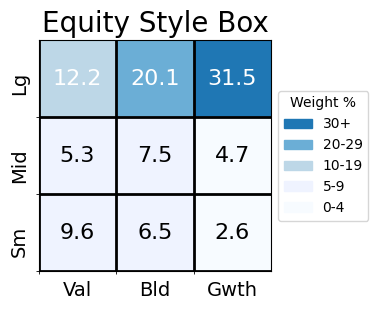

Sum of each row (aggregate market-cap exposure):
Lg: 63.8
Mid: 17.5
Sm: 18.7

Sum of each column (aggregate style exposure):
Val: 27.1
Bld: 34.1
Gwth: 38.8


In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_equity_style_box(allocations, categories, sizes):
    # Define the colors for different weight ranges
    colors = {
        '30+': '#1f77b4',
        '20-29': '#6baed6',
        '10-19': '#bdd7e7',
        '5-9': '#eff3ff',
        '0-4': '#f7fbff'
    }

    # Create a function to get color based on value
    def get_color(value):
        if value >= 30:
            return colors['30+']
        elif value >= 20:
            return colors['20-29']
        elif value >= 10:
            return colors['10-19']
        elif value >= 5:
            return colors['5-9']
        else:
            return colors['0-4']

    # Create the plot
    fig, ax = plt.subplots(figsize=(3, 3))

    # Plot the data
    for i in range(allocations.shape[0]):
        for j in range(allocations.shape[1]):
            value = allocations[i, j]
            color = get_color(value)
            ax.add_patch(plt.Rectangle((j, 2 - i), 1, 1, fill=True, color=color))
            ax.text(j + 0.5, 2 - i + 0.5, f'{value:.1f}', ha='center', va='center', fontsize=16, color='black' if value < 10 else 'white')

    # Set the ticks and labels
    ax.set_xticks(np.arange(len(categories)) + 0.5)
    ax.set_yticks(np.arange(len(sizes)) + 0.5)
    ax.set_xticklabels(categories, fontsize=14)
    ax.set_yticklabels(sizes[::-1], fontsize=14, rotation=90)

    # Set grid lines and limits
    ax.set_xlim(0, len(categories))
    ax.set_ylim(0, len(sizes))
    ax.grid(False)
    ax.set_xticks(np.arange(len(categories)), minor=True)
    ax.set_yticks(np.arange(len(sizes)), minor=True)
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    # Hide the major ticks
    ax.tick_params(which='major', bottom=False, left=False)

    # Add a legend
    legend_labels = ['30+', '20-29', '10-19', '5-9', '0-4']
    legend_colors = [colors[label] for label in legend_labels]
    legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
    ax.legend(legend_patches, legend_labels, title='Weight %', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title('Equity Style Box', fontsize=20)
    plt.show()

def print_sums(allocations, categories, sizes):
    # Calculate the sum of each row and column
    row_sums = allocations.sum(axis=1)
    col_sums = allocations.sum(axis=0)

    # Print the sums of each row and column
    print("Sum of each row (aggregate market-cap exposure):")
    for size, row_sum in zip(sizes, row_sums):
        print(f"{size}: {np.round(row_sum,1)}")

    print("\nSum of each column (aggregate style exposure):")
    for category, col_sum in zip(categories, col_sums):
        print(f"{category}: {np.round(col_sum,1)}")

def main(allocations, categories, sizes):
    # Assert that the total allocations sum to 100
    assert np.abs(allocations.sum() - 100) < 1e-5, f"Total allocations should sum to 100 but are {allocations.sum()}"

    # Plot the chart
    plot_equity_style_box(allocations, categories, sizes)

    # Print the sums
    print_sums(allocations, categories, sizes)

if __name__ == "__main__":
    # Example portfolio allocations (in percentage)
    allocations = np.array([
        [12.2, 20.1, 31.5],  # Large Cap: [Value, Balanced, Growth]
        [5.3, 7.5, 4.7],    # Mid Cap: [Value, Balanced, Growth]
        [9.6, 6.5, 2.6]     # Small Cap: [Value, Balanced, Growth]
    ])

    # Labels for the chart
    categories = ['Val', 'Bld', 'Gwth']
    sizes = ['Lg', 'Mid', 'Sm']

    # Run the main function
    main(allocations, categories, sizes)


## Running the Code

To run the code, execute the notebook cells in order. The `main` function will validate the allocation data, plot the equity style box, and print the aggregate market-cap and style exposures of the sample portfolio. Feel free to modify the `allocations` array with your portfolio data to visualize and analyze different portfolios.